In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
df=pd.read_csv('IM_DA_KS_ALL.csv')


In [4]:
df.head()

,DATE,IM_KS,DA_KS,DA_SYSTEM_PRICE,DA_TOTAL_VOLUME,DA_BUY_VOLUME,DA_SELL_VOLUME,PRECIPITATION,RADIATION,WIND_DIRECTION,WIND_SPEED,TEMPERATURE,GAS_USD,USD_JPY,GAS_JPY,TTS,TTB,TTM
0,2022-11-01 00:00:00,26.04,16.01,19.68,16085100,17531500,18189050,0.0,0.0,292.5,2.2,13.0,27.54,148.77,4097.0,149.77,147.77,148.77
1,2022-11-01 00:30:00,26.25,16.00,19.41,16050150,17907350,19453000,0.0,0.0,292.5,2.2,13.0,27.54,148.77,4097.0,149.77,147.77,148.77
2,2022-11-01 01:00:00,20.91,13.01,19.20,16013500,18151200,20249600,0.0,0.0,315.0,2.3,12.8,27.54,148.77,4097.0,149.77,147.77,148.77
3,2022-11-01 01:30:00,46.67,12.00,19.20,16013850,18287700,20478250,0.0,0.0,315.0,2.3,12.8,27.54,148.77,4097.0,149.77,147.77,148.77
4,2022-11-01 02:00:00,21.41,19.09,19.21,16017600,18416450,20585050,0.0,0.0,292.5,2.2,12.2,27.54,148.77,4097.0,149.77,147.77,148.77


In [6]:
df.drop(['IM_KS',"DA_SYSTEM_PRICE"],axis=1,inplace=True)

In [7]:
df.head()

,DATE,DA_KS,DA_TOTAL_VOLUME,DA_BUY_VOLUME,DA_SELL_VOLUME,PRECIPITATION,RADIATION,WIND_DIRECTION,WIND_SPEED,TEMPERATURE,GAS_USD,USD_JPY,GAS_JPY,TTS,TTB,TTM
0,2022-11-01 00:00:00,16.01,16085100,17531500,18189050,0.0,0.0,292.5,2.2,13.0,27.54,148.77,4097.0,149.77,147.77,148.77
1,2022-11-01 00:30:00,16.00,16050150,17907350,19453000,0.0,0.0,292.5,2.2,13.0,27.54,148.77,4097.0,149.77,147.77,148.77
2,2022-11-01 01:00:00,13.01,16013500,18151200,20249600,0.0,0.0,315.0,2.3,12.8,27.54,148.77,4097.0,149.77,147.77,148.77
3,2022-11-01 01:30:00,12.00,16013850,18287700,20478250,0.0,0.0,315.0,2.3,12.8,27.54,148.77,4097.0,149.77,147.77,148.77
4,2022-11-01 02:00:00,19.09,16017600,18416450,20585050,0.0,0.0,292.5,2.2,12.2,27.54,148.77,4097.0,149.77,147.77,148.77


In [8]:
# Ensure DATETIME is in datetime format and sort the data
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE', inplace=True)

In [10]:
df.head()

,DATE,DA_KS,DA_TOTAL_VOLUME,DA_BUY_VOLUME,DA_SELL_VOLUME,PRECIPITATION,RADIATION,WIND_DIRECTION,WIND_SPEED,TEMPERATURE,GAS_USD,USD_JPY,GAS_JPY,TTS,TTB,TTM
0,2022-11-01 00:00:00,16.01,16085100,17531500,18189050,0.0,0.0,292.5,2.2,13.0,27.54,148.77,4097.0,149.77,147.77,148.77
1,2022-11-01 00:30:00,16.00,16050150,17907350,19453000,0.0,0.0,292.5,2.2,13.0,27.54,148.77,4097.0,149.77,147.77,148.77
2,2022-11-01 01:00:00,13.01,16013500,18151200,20249600,0.0,0.0,315.0,2.3,12.8,27.54,148.77,4097.0,149.77,147.77,148.77
3,2022-11-01 01:30:00,12.00,16013850,18287700,20478250,0.0,0.0,315.0,2.3,12.8,27.54,148.77,4097.0,149.77,147.77,148.77
4,2022-11-01 02:00:00,19.09,16017600,18416450,20585050,0.0,0.0,292.5,2.2,12.2,27.54,148.77,4097.0,149.77,147.77,148.77


In [11]:
# We focus only on the SYSTEM_PRICE for the LSTM model
prices = df['DA_KS'].values.reshape(-1, 1)

In [12]:
NP = (prices- prices.min()) / (prices.max() - prices.min())
# NP = prices/prices[0] -1 

# NP = prices

# def normalise_min_max(prices):
#     return (prices - prices.min()) / (prices.max() - prices.min())

# def standardize(df):
#     return (prices - prices.mean()) / prices.std()

In [13]:
# Function to create sequences of data points for the LSTM model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define the sequence length (number of time steps)
sequence_length = 1 # Corresponding to 48 hours of data at 30 minute intervals

In [14]:
# Create sequences
X, y = create_sequences(NP, sequence_length)

In [15]:
len(X)

16203

In [16]:
len(y)

16203

In [17]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11342, 1, 1), (4861, 1, 1), (11342, 1), (4861, 1))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
model = Sequential()                    
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
# Due to resource limitations, we will limit the number of epochs and batch size
history = model.fit(X_train, y_train, batch_size=64, epochs=14, validation_data=(X_test, y_test))
    
# Summarize the model's architecture
model.summary()

Epoch 1/14
178/178 [==============================] - 5s 9ms/step - loss: 0.0119 - val_loss: 0.0017
Epoch 2/14
178/178 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/14
178/178 [==============================] - 1s 6ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/14
178/178 [==============================] - 1s 6ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/14
178/178 [==============================] - 1s 6ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/14
178/178 [==============================] - 1s 5ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 7/14
178/178 [==============================] - 1s 5ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 8/14
178/178 [==============================] - 1s 5ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 9/14
178/178 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/14
178/178 [==============================] - 1s 5ms/step - loss: 0.0018 - val_loss: 0.0015

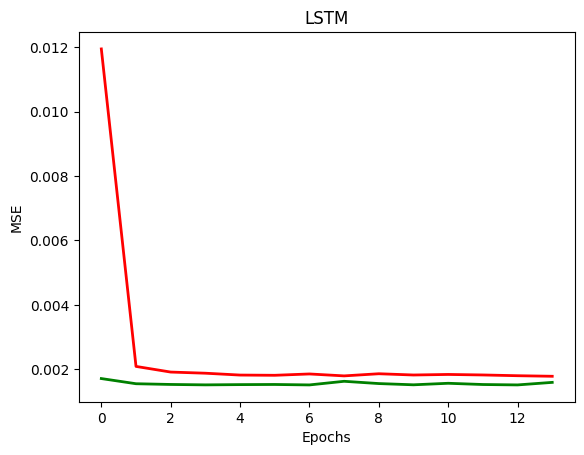

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [21]:
predicted_prices = model(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(predicted_prices, y_test)
MSE

0.001596522897964507

In [23]:
from sklearn.metrics import r2_score
R2=r2_score(predicted_prices, y_test)
R2

0.9228705900439227

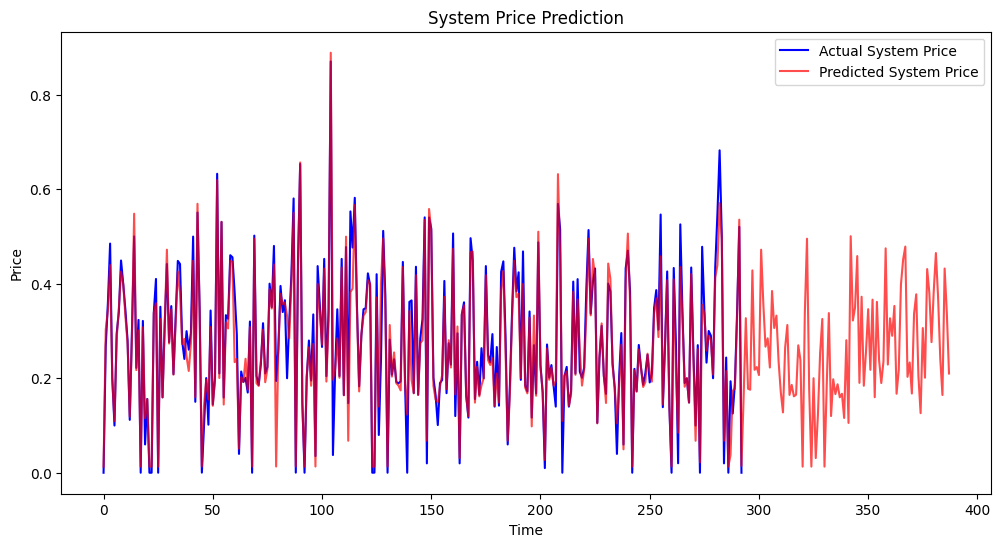

In [24]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test[:293], color='blue', label='Actual System Price')
plt.plot(predicted_prices[:388], color='red', alpha=0.7, label='Predicted System Price')
plt.title('System Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()